# Sistema de tres grados de libertad

Resuelve el sistema de la [figura](variablesDefinition.png), haciendo uso de [SymPy](https://www.sympy.org), una biblioteca en [Python](https://www.python.org) para mostrar el potencial del uso de herramientas computacionales en este tipo de problemas. 

![figura](variablesDefinition.png "sistema de tres grado de libertad")


In [1]:
# definicion de modulos a utilizar
from sympy import *
from sympy.physics.mechanics import *
init_printing()

import numpy as np

## Definición de variables

In [2]:
# simbolic variables definition
q1, q2, q3    = dynamicsymbols('q_1 q_2 q_3')              # coordenadas generalizadas
qt1, qt2, qt3 = dynamicsymbols('q_1 q_2 q_3', 1)           # 1ra derivadas coordenadas generalizadas
m1, m2, m3    = symbols('m_1 m_2 m_3', real = True)        # masas puntuales
k1, k2, k3    = symbols('k_1 k_2 k_3', real = True)        # constantes elásticas

# define generalized coordinates as a python list
q = [q1,q2,q3]

# real variables definition as a python dictionary
setupValues = {k1:50, k2:50, k3:50, m1:1, m2:1, m3:1}

# eigenvalues variables definition
w   = symbols('\omega', real = True)


## Lagrangiano

Cálculo de la energía cinética ($T$) y potencial ($V$) en términos de las coordenadas generalizadas ($q_{i}$) y sus velocidades ($\dot{q}_i$). Luego el Lagrangiano del sistema resulta
$$ \mathcal{L} = T - V $$

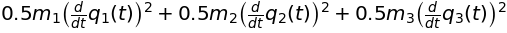

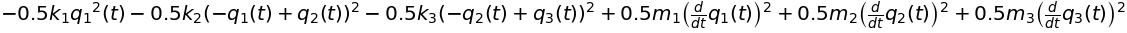

In [3]:
T = 1/2*m1*qt1**2 + 1/2*m2*qt2**2 + 1/2*m3*qt3**2           # energía cinética
V = 1/2*k1*q1**2 + 1/2*k2*(q2-q1)**2 + 1/2*k3*(q3-q2)**2    # energía potencial
L = T - V                                                   # lagrangiano

display(T,V,L)

## Ecuaciones de movimiento - EOM (equation of motion)
Luego las ecuaciones de movimiento podemos obtenerlas según
$$\frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot{q}_{i}} - \frac{\partial \mathcal{L}}{\partial q_{i}} = 0 \qquad \forall i =1,2,3 $$ 

### Mediante el uso de algebra simbólica de SymPy

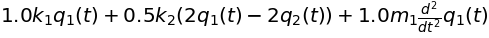

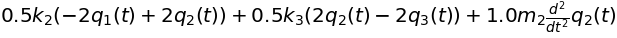

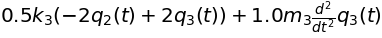

In [4]:
# compute motion equations
eq1 = diff(diff(L, qt1), 't') - diff(L, q1)
eq2 = diff(diff(L, qt2), 't') - diff(L, q2)
eq3 = diff(diff(L, qt3), 't') - diff(L, q3)

# simplify eqs  
simplify(eq1);simplify(eq2);simplify(eq3)

# show them
display(eq1,eq2,eq3)

### Mediante el uso del módulo *physics/mechanics* de SymPy
Aquí seguimos las intrucciones de [*sympy - mechanics/physics package*](https://docs.sympy.org/latest/modules/physics/mechanics/lagrange.html)

In [5]:
# 1ro, creamos el objeto lagrangeano 
LM = LagrangesMethod(L,[q1,q2,q3])

# 2do, con el objeto LM, podemos generar las ecuaciones de movimiento.
mechanics_printing(pretty_print=True)
LM.form_lagranges_equations()     # coinciden con las anteriores, calculadas "manualmente"
EOM = LM.eom
display(simplify(EOM))

⎡    1.0⋅k₁⋅q₁ + k₂⋅(q₁ - q₂) + 1.0⋅m₁⋅q₁̈    ⎤
⎢                                             ⎥
⎢-1.0⋅k₂⋅(q₁ - q₂) + k₃⋅(q₂ - q₃) + 1.0⋅m₂⋅q₂̈⎥
⎢                                             ⎥
⎣       -1.0⋅k₃⋅(q₂ - q₃) + 1.0⋅m₃⋅q₃̈        ⎦

## Cálculo de autovalores y autovectores

El ecuaciones de movimiento (EOMs) pueden ser escritas en forma matricial con el siguiente formato:

$$\mathbf{M} ~ \ddot{q} + \mathbf{K} ~ q = 0 $$
siendo $\mathrm{M}$ y $\mathrm{K}$ las matrices de masas y rigidez del sistema.

El cálculo de modos normales surge naturalmente introduciendo en el sistema de ecuaciones, soluciones de la forma:

$$q_{i} = q_{i0} cos(\omega t + \phi_{io})$$
siendo $q_{i0}$, $\omega$  y $\phi_{i0}$, la amplitud, la velocidad angular y fase inicial del movimiento, respectivamente.

El sistema resultante es de la forma:

$$( \mathbf{K} - \omega^{2} \mathbf{M} ) ~ q_{0} ~ cos(\omega t) = 0$$
siendo $q_{0}$ un vector cuyas componenetes son las amplitudes $q_{io}$.

Para que el sistema tenga solución distinta a la trivial ($q_{i0} = 0 ~ \forall i$), se requiere que el sistema no sea invertible, es decir, desde un punto de vista práctico, que su determinante sea nulo:

$$ \text{det}( \mathbf{K} - \omega^{2} \mathbf{M} ) = 0 $$

### Matriz de Masas $\mathbf{M}$

In [6]:
M = LM.mass_matrix
display(M)
display(M.subs(setupValues))

⎡1.0⋅m₁    0       0   ⎤
⎢                      ⎥
⎢  0     1.0⋅m₂    0   ⎥
⎢                      ⎥
⎣  0       0     1.0⋅m₃⎦

⎡1.0   0    0 ⎤
⎢             ⎥
⎢ 0   1.0   0 ⎥
⎢             ⎥
⎣ 0    0   1.0⎦

### Matriz de Rígidez $\mathbf{K}$

In [7]:
K = -LM.forcing.jacobian(q)  # el signo - se corresponde por definicion de SymPy, usa F = ma, F = Kx
display(K)
display(K.subs(setupValues))

⎡1.0⋅k₁ + 1.0⋅k₂      -1.0⋅k₂         0   ⎤
⎢                                         ⎥
⎢    -1.0⋅k₂      1.0⋅k₂ + 1.0⋅k₃  -1.0⋅k₃⎥
⎢                                         ⎥
⎣       0             -1.0⋅k₃      1.0⋅k₃ ⎦

⎡100.0  -50.0    0  ⎤
⎢                   ⎥
⎢-50.0  100.0  -50.0⎥
⎢                   ⎥
⎣  0    -50.0  50.0 ⎦

### Cálculo determinante - $\mathrm{det}(\mathbf{K}-\omega^{2} \mathbf{M})$

In [8]:
# muestra matriz (K - w^{2}*M)
display(K-w**2*M)

⎡            2                                                                
⎢- 1.0⋅\omega ⋅m₁ + 1.0⋅k₁ + 1.0⋅k₂               -1.0⋅k₂                     
⎢                                                                             
⎢                                                2                            
⎢             -1.0⋅k₂                - 1.0⋅\omega ⋅m₂ + 1.0⋅k₂ + 1.0⋅k₃       
⎢                                                                             
⎢                                                                             
⎣                0                                -1.0⋅k₃                - 1.0

                    ⎤
       0            ⎥
                    ⎥
                    ⎥
    -1.0⋅k₃         ⎥
                    ⎥
       2            ⎥
⋅\omega ⋅m₃ + 1.0⋅k₃⎦

### Cálculo autovalores - $\lambda$ ($\omega^{2}$)

#### Polinomio carácteristico

poly2 = 


Poly = 


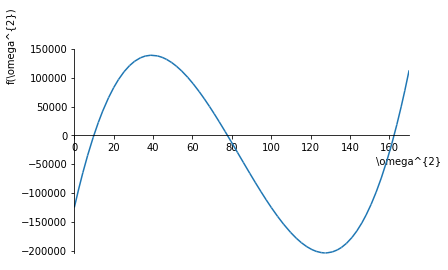

In [18]:
# calcula determinante
poly = (K-w**2*M).det()

# para usar w^2 como variable independiente
w2 = symbols('\omega^{2}')          # define w2 como variable independiente
poly2 = poly.subs(w**2,w2)          # substituye w2 por w**2
print('poly2 = ')
display(expand(poly2))

# reemplaza variables del sistema por valores reales
Poly = poly2.subs(setupValues)
print('Poly = ')
display(expand(Poly))
'''
Poly es el polinomio caracteristico, cuyas raices son la solucion
de w2, es decir w**2, siendo w las frecuencias naturales de oscilación.
''' 

# plot characteristic polynomial
p1 = plotting.plot(-1.0*Poly,(w2,0,170),show=False)      # plotea Poly para w2 entre (0, 170) 
p1.show()                                           # muestra en pantalla

#### Cálculo de raíces

In [10]:
# encuentra las raíces
roots = solve(Poly, w2)        # note estamos resolviendo en w2, por tanto w = +sqrt(w2)

# muestra raices por pantalla. Dado que el método de resolución puede encontrar 
# raíces complejas, es usual encontrar raíces reales con un pequeño residuo 
# complejo. Por esa razón, sólo mostramos la parte real de las raíces. 
W = []
for i in range(len(roots)):
    wi = sqrt(re(roots[i]))         # calcula parte real de la raíz y computa la raíz cuadrada
    myString = "omega_{} = {}"      
    print(myString.format(i+1,wi))  # muestra la i-ésima raíz
    W.append(wi)                    # guarda las raíces en una lista W

omega_1 = 3.14692122712948
omega_2 = 8.81747733789935
omega_3 = 12.7416239226353


### Cálculo de autovectores - $\boldsymbol{v}$ 

Remplazando los valores de $\omega_{i}$ en el sistema 

$$(\mathbf{K}-\omega_{i}^{2} \mathbf{M}) ~ \mathbf{q} = 0$$
Surgen tantos sistemas de ecuaciones de como grados de libertad (DOF) tenga el sistema (en este caso tres: $\omega_{1}$, $\omega_{2}$ y $\omega_{3}$) con DOF incógnitas cada uno de ellos. 

Dado que la información relevante de los autovectores, no es una magnitud sino su dirección, es posible resolver el sistema de ecuaciones asignando arbitrariamente un valor a una de las incognitas para cada uno de los sistemas, es decir realizar una reducción del mismo

$$ A_{ij} q_{0j} = - q_{0k} A_{ik} \qquad  \forall i,j\neq k $$
siendo $q_{0k}$ un valor asignado arbitrariamente.

In [11]:
# Resolución sistema de ecuaciones Ax=b por reducción 

n = len(q)                              # dimensión del sistema de ecuaciones (=DOF)
x = np.zeros(len(q))                    # init x. q is a list formed by generalized coordinates q_{i}
eigenVectors = np.zeros([n,n])
x = np.zeros(n)

for i in range(len(W)):
    A = (K-W[i]**2*M).subs(setupValues)
    Anp = np.array(A).astype(np.float64)    # cast SymPy Matrix into numpy array
    Ar = Anp[1:,1:]                         # sistema de ecuaciones reducido. Elimina 1er DOF 
    br = 0.0
    br = br - 1.0 * Anp[1:,0]               # asume amplitud unitaria en la eliminación del 1er DOF
    x[0] = 1.0                              # consistente con la reduccion en br
    x[1:] = np.linalg.solve(Ar, br)         # solves Ar*x = br system throught numpy functions
    eigenVectors[i,:] = x               


display(eigenVectors)    # muestra la solución
(K-W[1]**2*M).subs(setupValues)


array([[ 1.        ,  1.80193774,  2.2469796 ],
       [ 1.        ,  0.44504187, -0.80193774],
       [ 1.        , -1.2469796 ,  0.55495813]])

⎡22.2520933956315       -50.0                0        ⎤
⎢                                                     ⎥
⎢     -50.0        22.2520933956315        -50.0      ⎥
⎢                                                     ⎥
⎣       0               -50.0        -27.7479066043685⎦

### Autovector - $\boldsymbol{v}$

La figura muestra en forma cualitativa la representación del autovector $\boldsymbol{v}_{1}$, dado que se encuentra en el primer octante del espacio de configuraciones compredido por $(q_{1}, q_{2}, q_{3})$ (asumiendo unitaria la componente en $q_{1}$).

![figura](eigenvector.png)

Proyectando el autovector $\boldsymbol{v}_{1}$ en cada uno de los planos, se observan los espacios de configuraciones $q_{1} q_{2}$, $q_{1} q_{3}$ y $q_{2} q_{3}$

## Solución general

La solución general al problema de oscilaciones libres la podemos escribir como una combinación lineal de los $n$ modos normales de oscilación.

$$ q_{i}(t) = \sum_{l=1}^{n} c_{l} v_{i}^{l} cos(\omega_l t + \phi_{l0}) $$
siendo $v_{i}^{l}$ la i-ésima componente del autovector $\boldsymbol{v}$ asociado al l-ésimo autovalor $\lambda$. Por otro lado $c_{l}$ y $\phi_{l0}$ son constantes a determinar determinar que surgen de las condiciones iniciales del sistema, $q_{i0}$ y $\dot{q}_{i0}$.

Por otro lado, un manera sencilla de hacer oscilar al sistema en un modo normal, es perturbarlo de la posición de equilibrio en la dirección del autovector $\boldsymbol{v}$ asociado al autovalor $\lambda$ deseado. 




Para poner al sistema completo a oscilar en el modo normal $\omega_{k}$, necesariamente la solución general del problema se ve reducida a:

$$ q_{i} = c_{i} v_{i}^{k} cos(\omega_{k} t + \phi_{k0})$$

Además, si asumimos velocidades iniciales nulas, $\dot{q}_{i0} = 0$, es fácíl notar que $\phi_{k0} = 0$. 

$$ q_{i} = c_{i} v_{i}^{k} cos(\omega_{k} t)$$

Esta ecuación representa la ecuación de una recta, donde las constantes $c_{i}$ de ajustan con las condiciones iniciales $q_{i0}$

In [12]:
# Calculo solucion general 
# utiliza formato de combinación lineal de senos y cosenos
# 

# condiciones iniciales
q0 = [0.0, 0.0, 0.5]
#q0 = [ 1.        ,  1.80193774,  2.2469796 ]
#q0 = [ 1.        ,  0.44504187, -0.80193774]
#q0 = [ 1.        , -1.2469796 ,  0.55495813]

q0n = np.array(q0).astype(np.float64)    # cast python list to a numpy array

#print("eigenVectors & initialConditions")
#display(np.transpose(eigenVectors), q0n)

# solve v_{i}^{l} C_{l} = q_{i0}
C = np.linalg.solve(np.transpose(eigenVectors), q0n)

print("C:")
display(C)

# define initial conditions (velocities)
q0t = [0.0, 0.0, 0.0]
q0tn = np.array(q0t).astype(np.float64)

A = np.copy(np.transpose(eigenVectors))
display(A)
for i in range(n):
    A[:,i] = A[:,i] * W[i]

S = np.linalg.solve(A, q0tn)
    
display(S)



C:


array([ 0.12085868, -0.21777981,  0.09692113])

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.80193774,  0.44504187, -1.2469796 ],
       [ 2.2469796 , -0.80193774,  0.55495813]])

array([ 0.,  0., -0.])

## solución

In [13]:
t = np.arange(0., 10., 0.02)

qSol=np.zeros((n+1,len(t)))

for i in range(n):     # loop for each qSol --> q1,...,qn
    qSol[i,:] = 0.0
    for j in range(n): # loop for linear combination of normal modes
        #qSol[i,:] = qSol[i,:] + C[j]*eigenVectors[i,j]*np.cos(float(W[j])*t)   # linea original
        # 
        qSol[i,:] = qSol[i,:] + C[j]*eigenVectors[j,i]*np.cos(float(W[j])*t)   # 

#qSol.tofile('qSol.csv',sep=',',format='%10.5f')
qSol[3,:] = t
np.savetxt('qSol.csv',np.transpose(qSol),delimiter=', ',fmt='%.5e',header='qSol1, qSol2, qSol3, t')

## ecuaciones horarios

In [14]:
from matplotlib import pyplot as plt 

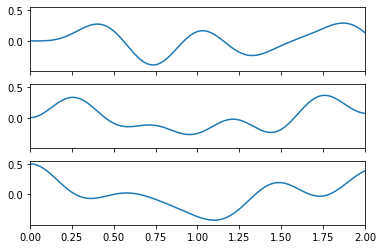

In [15]:
#plt.plot(t,qSol[0,:],t,qSol[1,:],t,qSol[2,:])
#plt.show()

#
fig, axs = plt.subplots(3, sharex=True, sharey=True)
axs[0].plot(t, qSol[0,:])
axs[1].plot(t, qSol[1,:])
axs[2].plot(t, qSol[2,:])


# axis size
plt.xlim(0,2)
plt.ylim()
plt.show()


fig2 = plt


## espacio de configuraciones

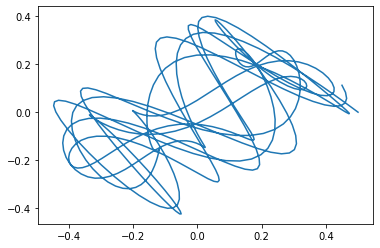

In [16]:
plt.plot(qSol[2,:],qSol[1,:])
plt.show()

## Energía cinética y potencial del sistema

In [17]:
#t = np.arange(0., 10., 0.02)

kinetic   = np.zeros(len(t))
potential = np.zeros(len(t))

#setupValues = {k1:50, k2:50, k3:50, m1:1, m2:1, m3:1}
m = 3 * []
k = 3 * []
m[0] = setupValues['m1']
m[1] = setupValues['m2']
m[2] = setupValues['m3']
k[0] = setupValues['k1']
k[1] = setupValues['k2']
k[2] = setupValues['k3']

qt = 3 * []
qt[]

T = 1/2*m[0]*qt1**2 + 1/2*m2*qt2**2 + 1/2*m3*qt3**2



#T = 1/2*m1*qt1**2 + 1/2*m2*qt2**2 + 1/2*m3*qt3**2           # energía cinética
#V = 1/2*k1*q1**2 + 1/2*k2*(q2-q1)**2 + 1/2*k3*(q3-q2)**2    # energía potencial

SyntaxError: invalid syntax (<ipython-input-17-7fbe3d91fafe>, line 17)